# Part 0

In [28]:
# --- 0. Import libraries and load dataset ---

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

# Load dataset
data_path = "/content/drive/MyDrive/EFIplus_medit.csv"
df = pd.read_csv(data_path, sep=';')

# Clean column names
df.columns = df.columns.str.strip().str.lower()
print(f"✅ Loaded dataset with {df.shape[0]} rows and {df.shape[1]} columns.")



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
✅ Loaded dataset with 5011 rows and 164 columns.


# Part 1

In [29]:
# --- 1. Filter Douro and Tejo basins ---

# Filter for target basins
df_filtered = df[df['catchment_name'].isin(['Douro', 'Tejo'])]

# Environmental variables to use
env_vars = [
    'altitude', 'actual_river_slope', 'elevation_mean_catch',
    'prec_ann_catch', 'temp_ann', 'temp_jan', 'temp_jul'
]

# Drop rows with missing data in these vars
basins_df = df_filtered[env_vars].dropna()
print(f"✅ Filtered to {basins_df.shape[0]} valid records for clustering.")


✅ Filtered to 888 valid records for clustering.


# Part 2

In [30]:
# --- 2. Normalize variables ---

scaler = StandardScaler()
basins_scaled = scaler.fit_transform(basins_df)
scaled_df = pd.DataFrame(basins_scaled, columns=basins_df.columns)


# Part 3

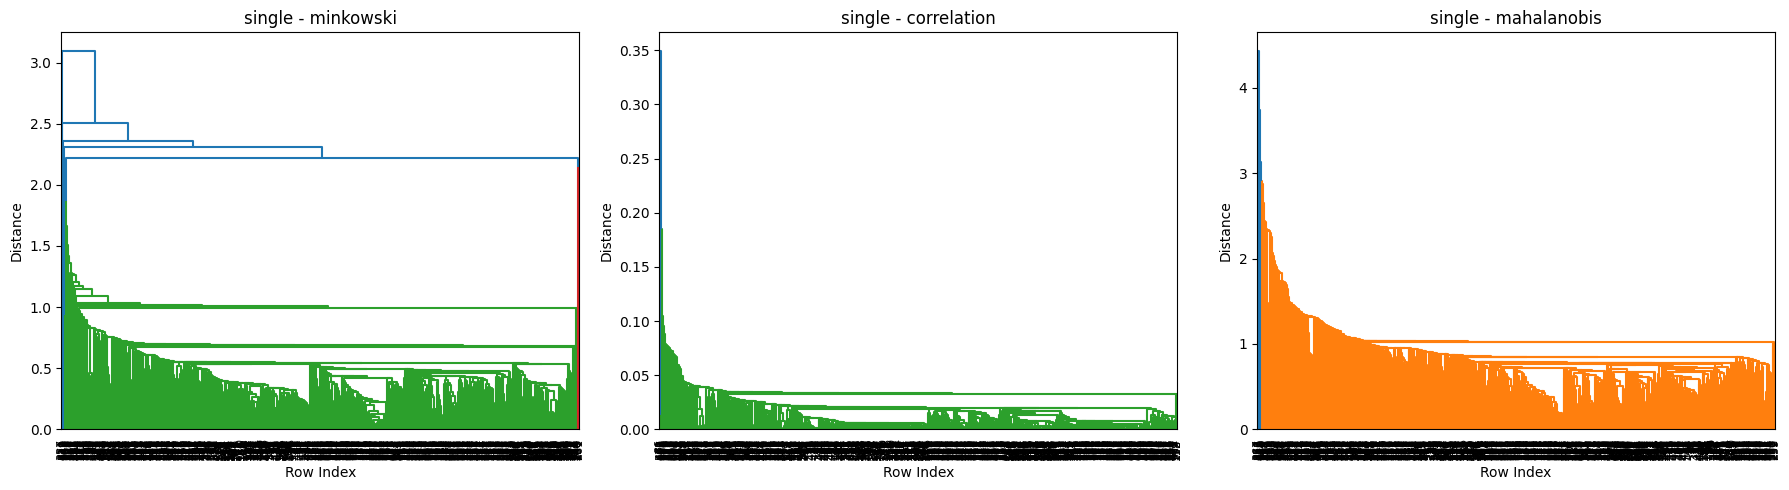

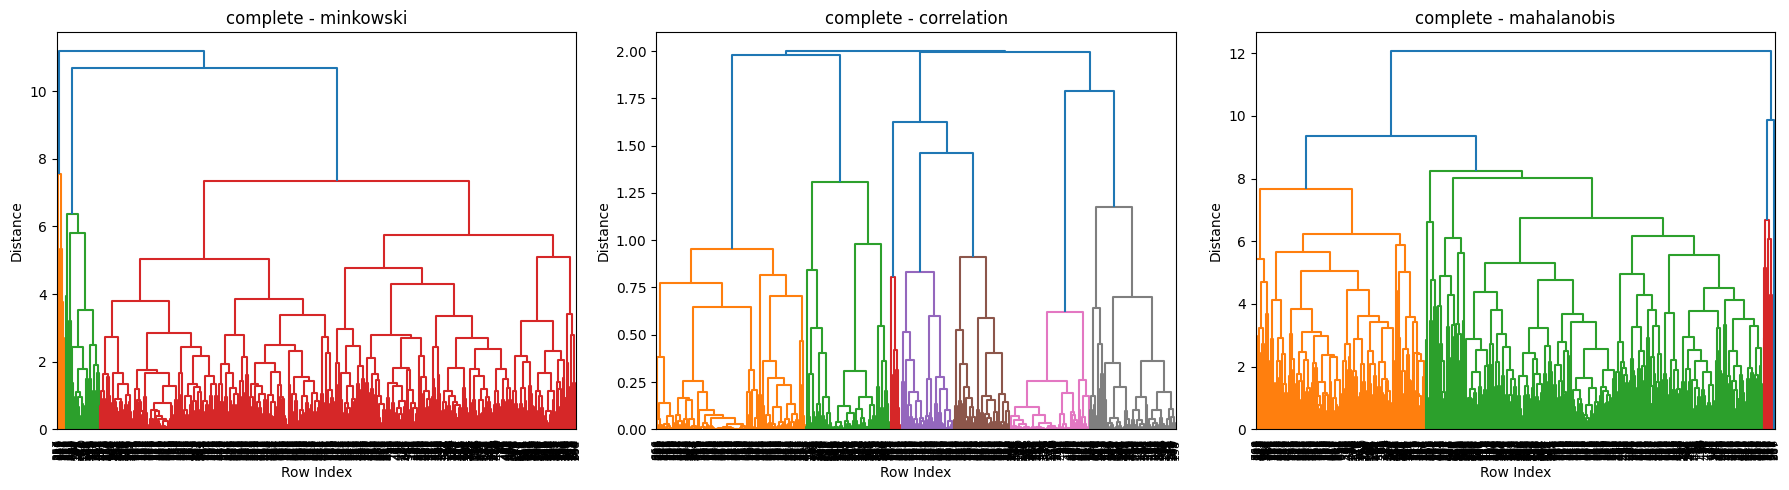

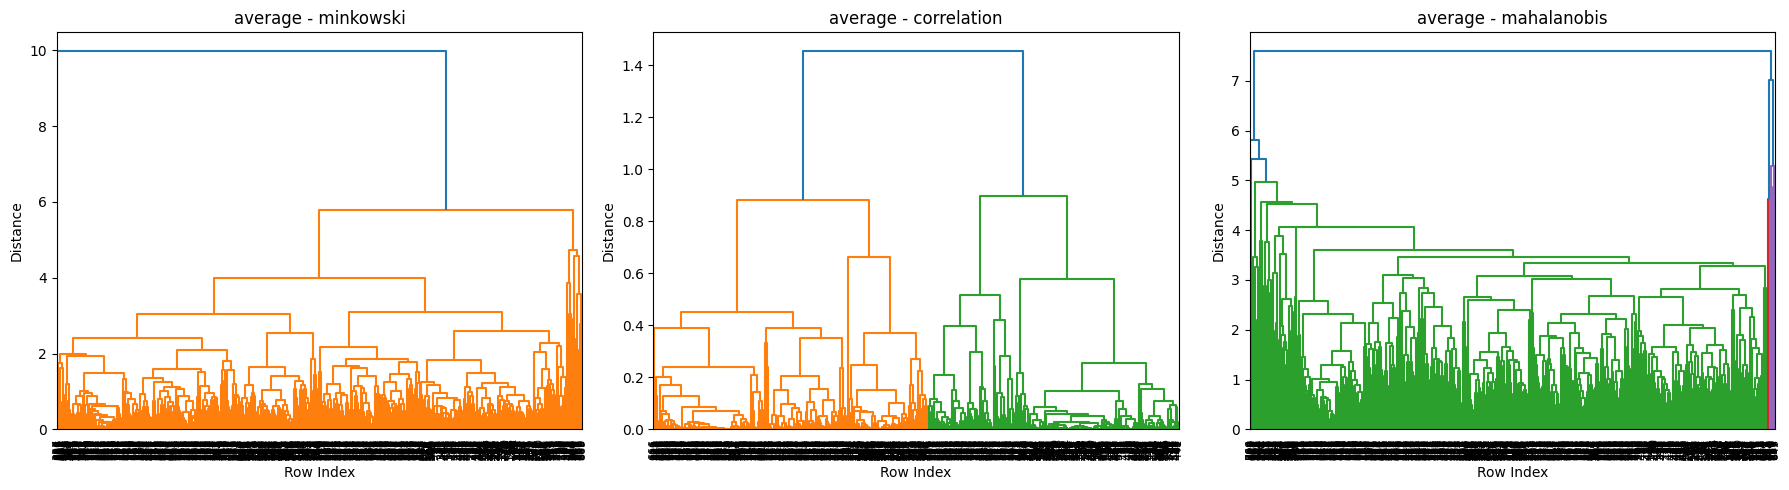

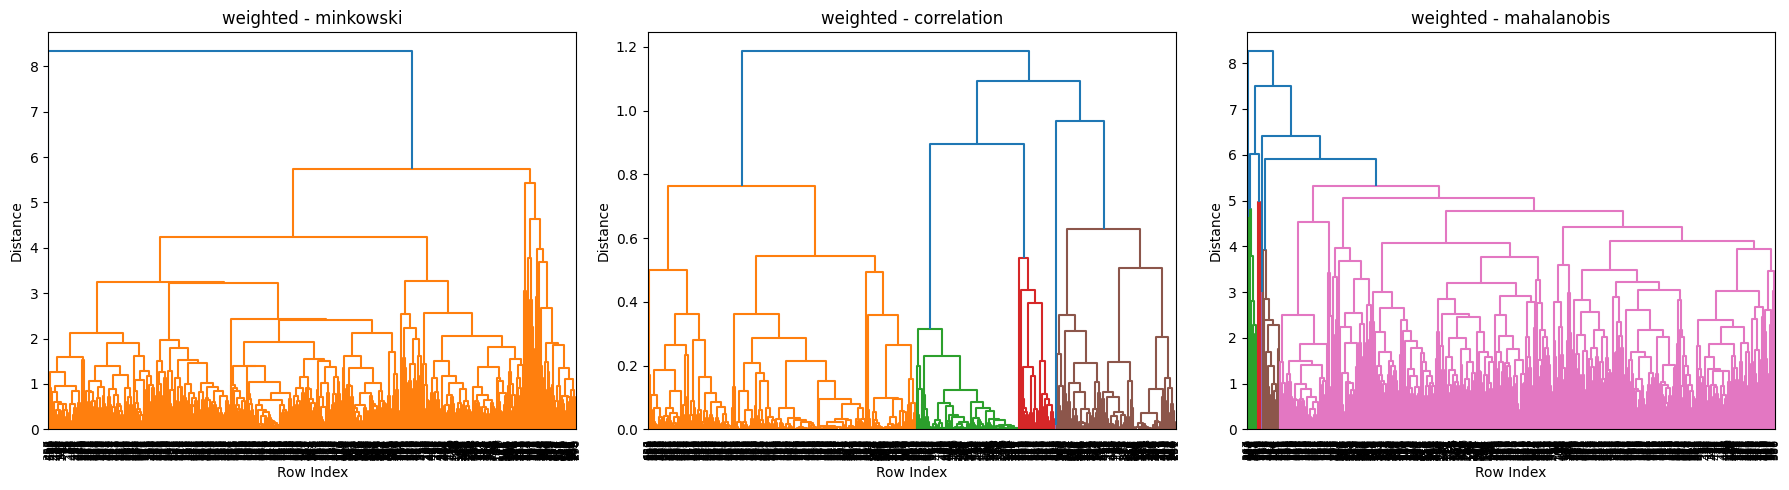

In [39]:
# --- 3. Dendrograms for all linkage/distance combinations (with row index labels) ---

link_methods = ['single', 'complete', 'average', 'weighted']
diss_metrics = ['minkowski', 'correlation', 'mahalanobis']
row_labels = scaled_df.index.astype(str).tolist()

for link in link_methods:
    plt.figure(figsize=(18, 5))
    for i, metric in enumerate(diss_metrics, 1):
        plt.subplot(1, len(diss_metrics), i)
        try:
            Z = linkage(scaled_df, method=link, metric=metric)
            dendrogram(Z, labels=row_labels, leaf_rotation=90, leaf_font_size=8)
            plt.title(f"{link} - {metric}")
            plt.xlabel("Row Index")
            plt.ylabel("Distance")
        except Exception as e:
            plt.title(f"{link} - {metric}\n[ERROR]")
            print(f"Error with {link}-{metric}: {e}")
    plt.tight_layout()
    plt.show()


# Part 4

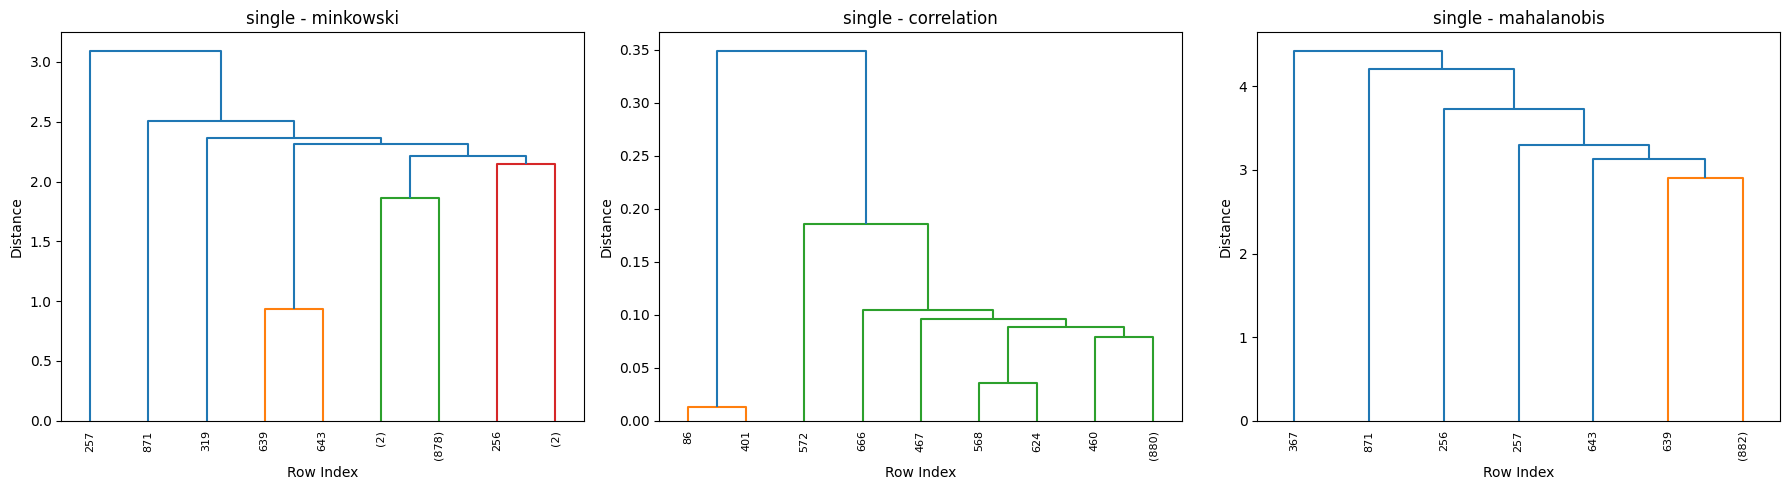

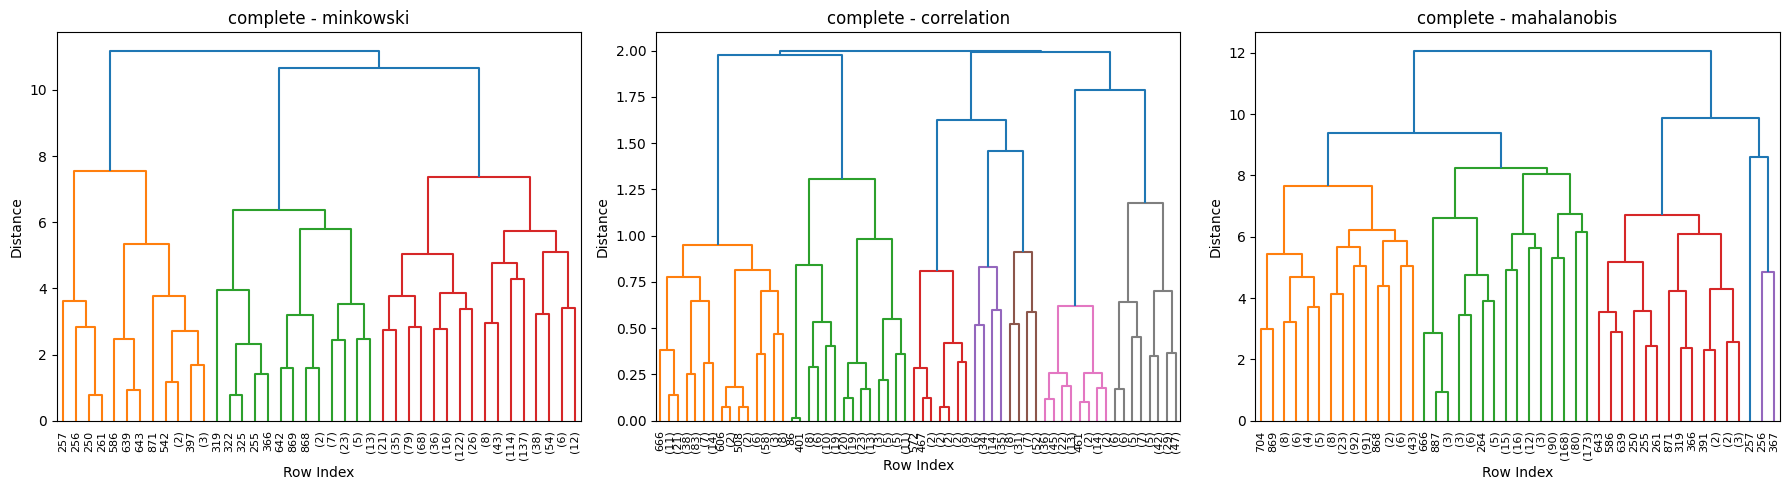

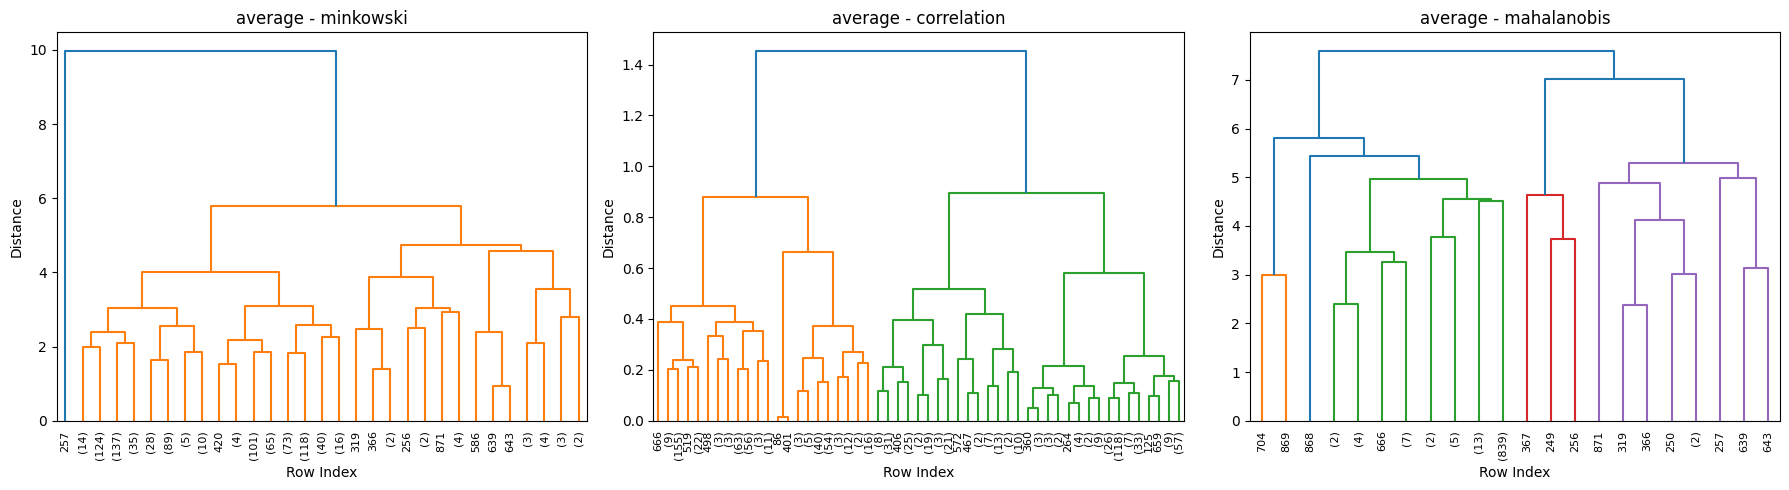

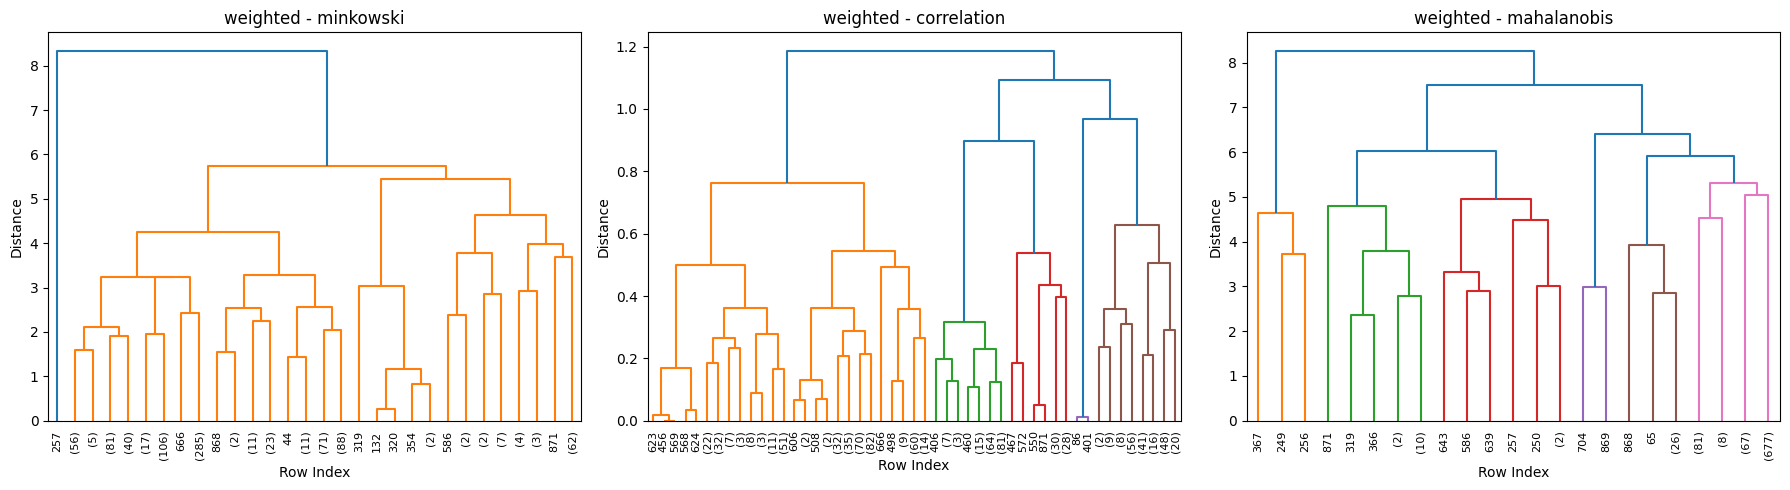

In [40]:
# --- 4. Dendrograms truncated to 5 levels (with row index labels) ---

for link in link_methods:
    plt.figure(figsize=(18, 5))
    for i, metric in enumerate(diss_metrics, 1):
        plt.subplot(1, len(diss_metrics), i)
        try:
            Z = linkage(scaled_df, method=link, metric=metric)
            dendrogram(Z, labels=row_labels, truncate_mode='level', p=5,
                       leaf_rotation=90, leaf_font_size=8)
            plt.title(f"{link} - {metric}")
            plt.xlabel("Row Index")
            plt.ylabel("Distance")
        except Exception as e:
            plt.title(f"{link} - {metric}\n[ERROR]")
            print(f"Truncated error with {link}-{metric}: {e}")
    plt.tight_layout()
    plt.show()



# Part 5

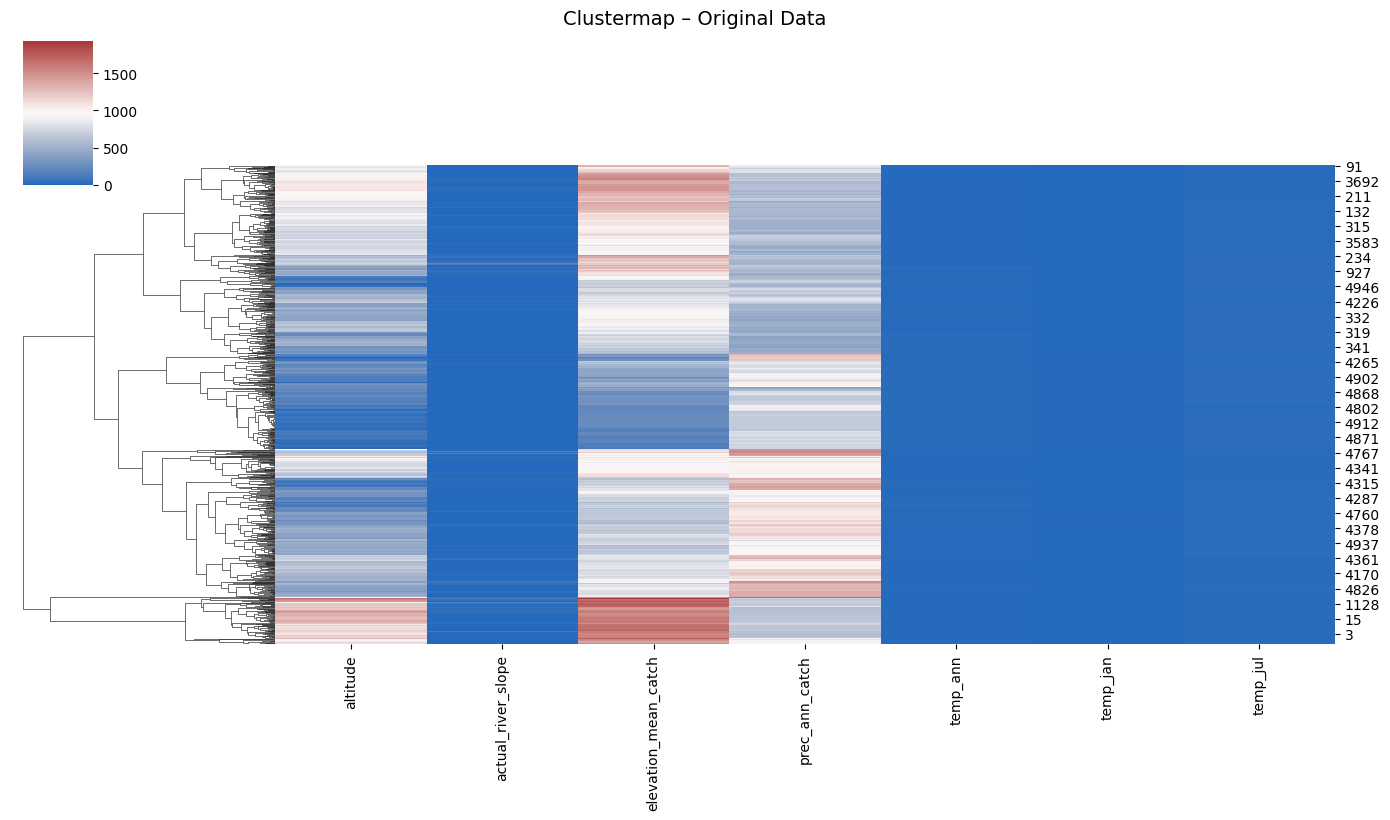

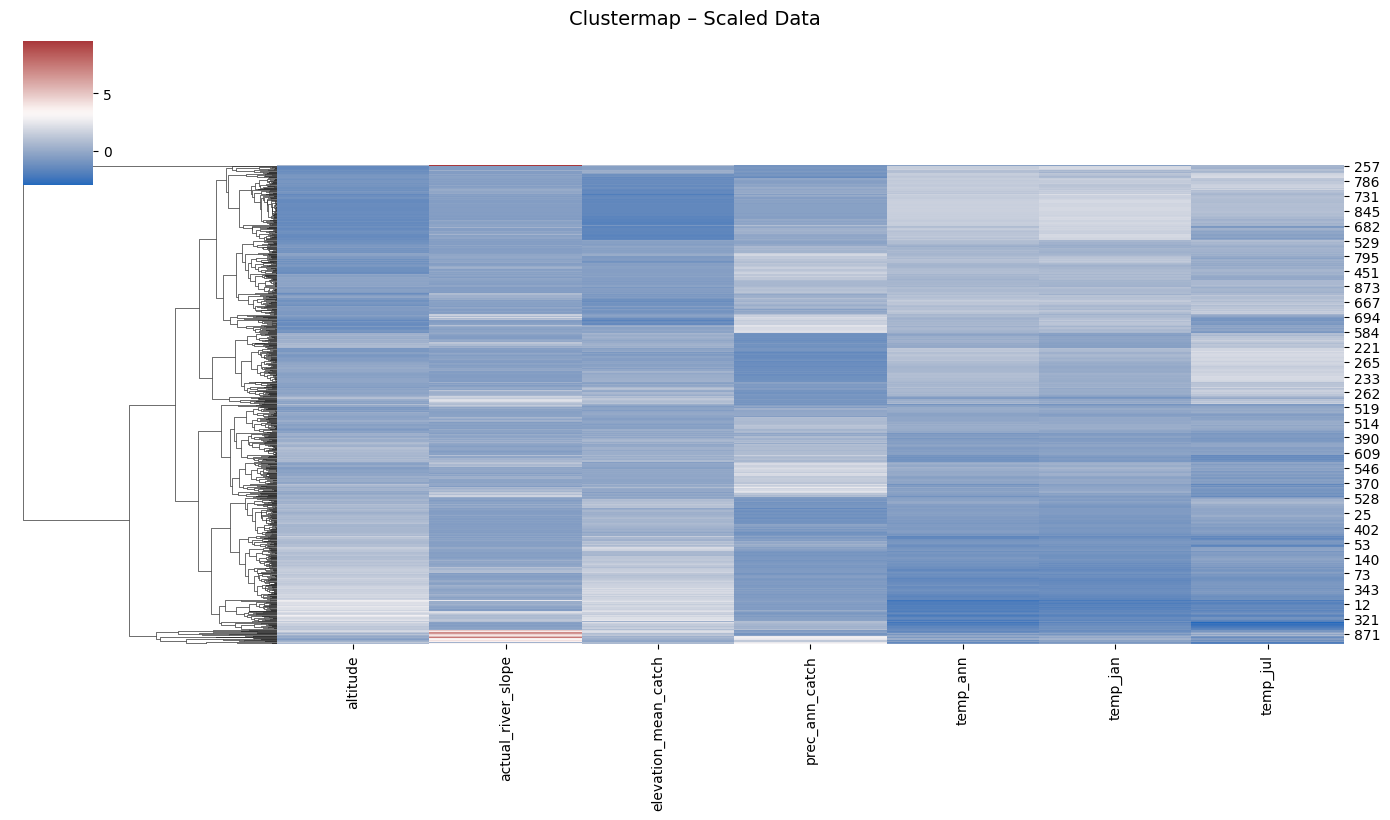

In [33]:
# --- 5. Clustermap (heatmap + dendrogram) of sites ---

# Clustermap without scaling (original values)
sns.clustermap(
    basins_df,
    col_cluster=False,
    row_cluster=True,
    method='average',
    cmap='vlag',
    figsize=(14, 8)
)
plt.suptitle("Clustermap – Original Data", fontsize=14, y=1.02)
plt.show()

# Clustermap with scaled values
sns.clustermap(
    scaled_df,
    col_cluster=False,
    row_cluster=True,
    method='average',
    cmap='vlag',
    figsize=(14, 8)
)
plt.suptitle("Clustermap – Scaled Data", fontsize=14, y=1.02)
plt.show()


# Part 6

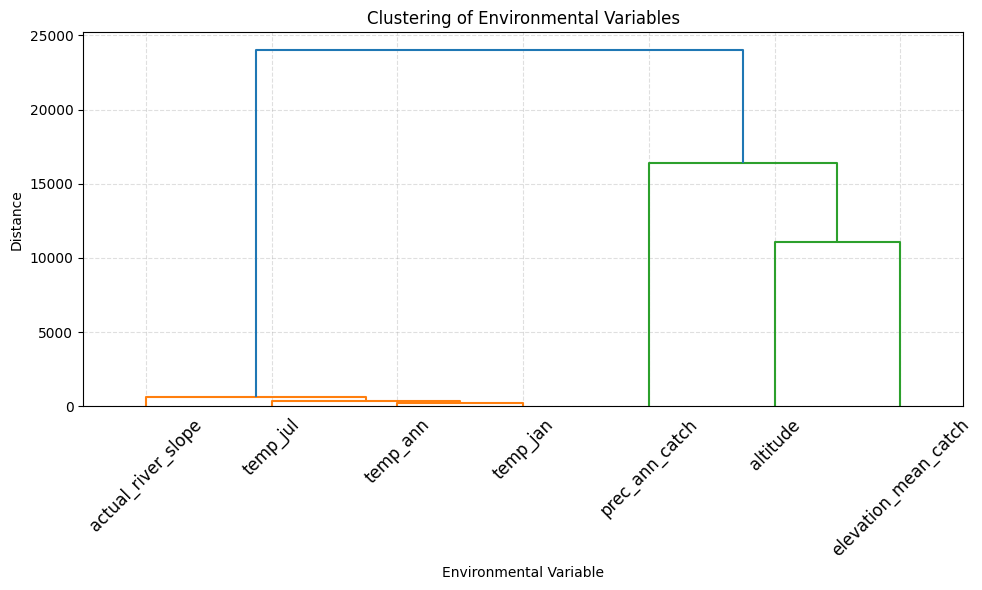

In [36]:
# --- 6. Dendrogram of environmental variables (transposed) ---

transposed = basins_df.T
labels = transposed.index.tolist()

Z = linkage(transposed, method='average')

plt.figure(figsize=(10, 6))
dendrogram(Z, labels=labels)
plt.title("Clustering of Environmental Variables")
plt.xlabel("Environmental Variable")
plt.ylabel("Distance")
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.4)
plt.show()